# Fit the same experiment using ML, Bootstrap and Bayesian fitters
Fits binding of calcium onto EDTA. 

In [1]:
%matplotlib inline
import pytc

In [2]:
# Define functions to do each fit

def fit_with_ml():
    #--------------------------------------------------------------------
    # Create a global fitting instance
    g = pytc.GlobalFit()

    # --------------------------------------------------------------------
    # Load in an experimental data set with a single-site binding model.  Ignore the first two shots
    a = pytc.ITCExperiment("ca-edta/tris-01.DH",pytc.indiv_models.SingleSite,shot_start=2)

    # Add the experiment to the fitter
    g.add_experiment(a)

    # --------------------------------------------------------------------
    # Fit the data
    g.fit()
    
    return g

def fit_with_bootstrap(num_bootstrap=1000):
    # --------------------------------------------------------------------
    # Create a global fitting instance
    g = pytc.GlobalFit()

    # --------------------------------------------------------------------
    # Load in an experimental data set with a single-site binding model.  Ignore the first two shots
    a = pytc.ITCExperiment("ca-edta/tris-01.DH",pytc.indiv_models.SingleSite,shot_start=2)

    # Add the experiment to the fitter
    g.add_experiment(a)

    # --------------------------------------------------------------------
    # Fit the data

    F = pytc.fitters.BootstrapFitter(num_bootstrap=num_bootstrap)
    g.fit(F)

    return g
    
def fit_with_bayes(num_steps=1000):
    # --------------------------------------------------------------------
    # Create a global fitting instance
    g = pytc.GlobalFit()

    # --------------------------------------------------------------------
    # Load in an experimental data set with a single-site binding model.  Ignore the first two shots
    a = pytc.ITCExperiment("ca-edta/tris-01.DH",pytc.indiv_models.SingleSite,shot_start=2)

    # Add the experiment to the fitter
    g.add_experiment(a)

    # --------------------------------------------------------------------
    # Fit the data
    F = pytc.fitters.BayesianFitter(num_steps=num_steps)
    g.fit(F)
    
    return g

### Do fits

In [3]:
print("*** ML fit ***")
ml = fit_with_ml()

print("*** Bootstrap fit ***")
bootstrap = fit_with_bootstrap(num_bootstrap=1000)

print("*** Bayesian fit ***")
bayes = fit_with_bayes(num_steps=1000)


*** ML fit ***
*** Bootstrap fit ***
*** Bayesian fit ***


### Show fits

# Fit successful? True
# 2017-05-16 08:54:12.940750
# Units: cal/mol
# Fit type: maximum likelihood
# AIC: -96.23759423779696
# AICc: -93.8028116291013
# BIC: -84.30368995841131
# F: 292708.2585218862
# Rsq: 0.9999672039142115
# Rsq_adjusted: 0.9999637876552752
# df: 49
# ln(L): 54.11879711889848
# num_obs: 54
# num_param: 5
type,name,exp_file,value,stdev,bot95,top95,fixed,guess,lower_bound,upper_bound
local,K,ca-edta/tris-01.DH,4.05476e+07,4.31258e+05,3.96805e+07,4.14147e+07,False,1.00000e+06,-inf,inf
local,dH,ca-edta/tris-01.DH,-1.15669e+04,1.00638e+01,-1.15872e+04,-1.15467e+04,False,-4.00000e+03,-inf,inf
local,dilution_heat,ca-edta/tris-01.DH,1.15715e+03,4.65377e+02,2.21447e+02,2.09285e+03,False,0.00000e+00,-inf,inf
local,fx_competent,ca-edta/tris-01.DH,9.73948e-01,8.86443e-05,9.73770e-01,9.74126e-01,False,1.00000e+00,-inf,inf
local,dilution_intercept,ca-edta/tris-01.DH,-6.12671e-01,6.71064e-02,-7.47597e-01,-4.77744e-01,False,0.00000e+00,-inf,inf



/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


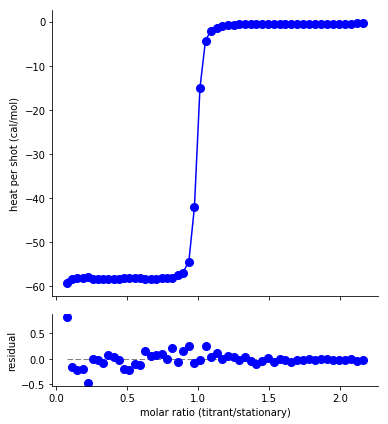

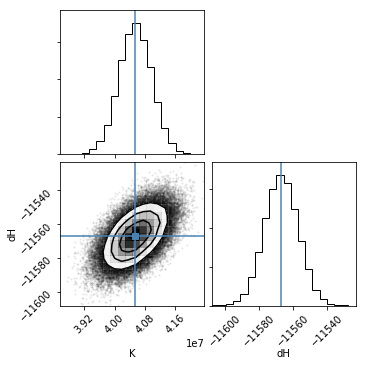

In [4]:
print(ml.fit_as_csv)
fig, ax = ml.plot()
c = ml.corner_plot()

# Fit successful? True
# 2017-05-16 08:54:16.684167
# Units: cal/mol
# Fit type: bootstrap
#   bootstrap: Num bootstrap: 1000
#   bootstrap: Perturb size: 1.0
#   bootstrap: Use experimental error: False
# AIC: 13.404520328869054
# AICc: 15.839302937564707
# BIC: 25.3384246082547
# F: 292693.7752068074
# Rsq: 0.999967201476932
# Rsq_adjusted: 0.9999637849641124
# df: 49
# ln(L): -0.7022601644345275
# num_obs: 54
# num_param: 5
type,name,exp_file,value,stdev,bot95,top95,fixed,guess,lower_bound,upper_bound
local,K,ca-edta/tris-01.DH,4.05266e+07,6.00161e+05,3.93161e+07,4.16839e+07,False,1.00000e+06,-inf,inf
local,dH,ca-edta/tris-01.DH,-1.15682e+04,1.40551e+01,-1.15951e+04,-1.15408e+04,False,-4.00000e+03,-inf,inf
local,dilution_heat,ca-edta/tris-01.DH,1.09898e+03,6.51307e+02,-1.11415e+02,2.36652e+03,False,0.00000e+00,-inf,inf
local,fx_competent,ca-edta/tris-01.DH,9.73944e-01,1.23010e-04,9.73712e-01,9.74194e-01,False,1.00000e+00,-inf,inf
local,dilution_intercept,ca-edta/tris-01.DH,-6.04592e

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


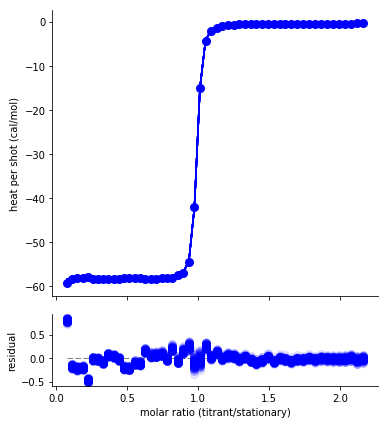

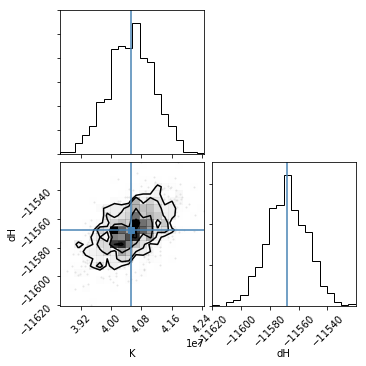

In [5]:
print(bootstrap.fit_as_csv)
fig, ax = bootstrap.plot()
c = bootstrap.corner_plot()

# Fit successful? True
# 2017-05-16 08:54:21.657251
# Units: cal/mol
# Fit type: bayesian
#   bayesian: Burn in: 0.1
#   bayesian: Final sample number: 90000
#   bayesian: Initial walker spread: 0.0001
#   bayesian: Num steps: 1000
#   bayesian: Num threads: 1
#   bayesian: Num walkers: 100
#   bayesian: Use ML guess: True
# AIC: -96.23408438035047
# AICc: -93.79930177165481
# BIC: -84.30018010096482
# F: 292710.45233633684
# Rsq: 0.9999672030945854
# Rsq_adjusted: 0.9999637867502714
# df: 49
# ln(L): 54.11704219017523
# num_obs: 54
# num_param: 5
type,name,exp_file,value,stdev,bot95,top95,fixed,guess,lower_bound,upper_bound
local,K,ca-edta/tris-01.DH,4.05676e+07,6.04826e+05,3.94059e+07,4.17682e+07,False,1.00000e+06,-inf,inf
local,dH,ca-edta/tris-01.DH,-1.15668e+04,1.39959e+01,-1.15941e+04,-1.15394e+04,False,-4.00000e+03,-inf,inf
local,dilution_heat,ca-edta/tris-01.DH,1.17387e+03,6.47335e+02,-1.01149e+02,2.44076e+03,False,0.00000e+00,-inf,inf
local,fx_competent,ca-edta/tris-01.DH,9.739

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


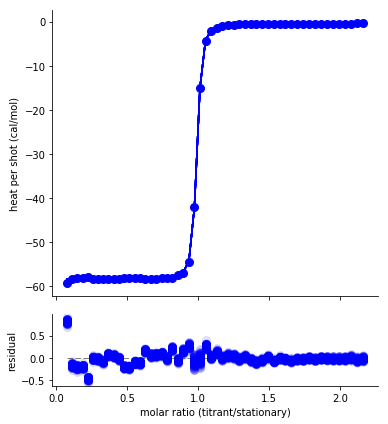

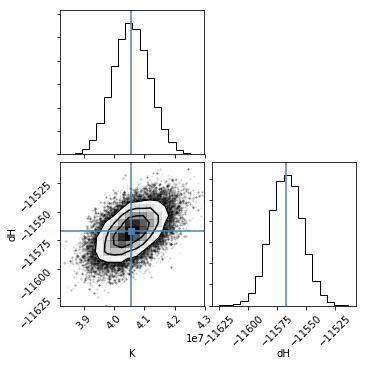

In [6]:
print(bayes.fit_as_csv)
fig, ax = bayes.plot()
c = bayes.corner_plot()

###  Show timing

In [7]:
print("*** ML fit ***")
%timeit fit_with_ml()
print("")

print("*** Bootstrap fit ***")
%timeit fit_with_bootstrap(1000)
print("")

print("*** Bayesian fit ***")
%timeit fit_with_bayes(1000)
print("")

*** ML fit ***
10 loops, best of 3: 13.6 ms per loop

*** Bootstrap fit ***
1 loop, best of 3: 13 s per loop

*** Bayesian fit ***
1 loop, best of 3: 12.5 s per loop

